# **GRAFOS**

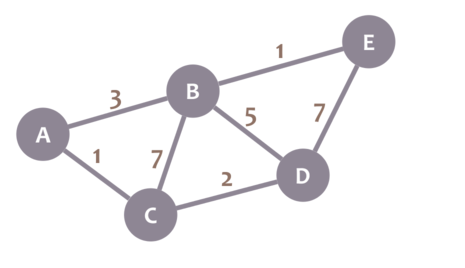

In [39]:
import matplotlib.pyplot as plt

class PersonalizedException(Exception):
    """
    Excepción personalizada para lanzar y provocar casque
    """
    def __init__(self, *args: object) -> None:
        super().__init__(*args)


class Grafo():
    def __init__(self) -> None:
        self.nodos = {}
    
    def add_node(self,nodo,**kargs) -> None:
        if nodo in self.nodos: raise PersonalizedException("YA EXISTE EL NODO")
        self.nodos[nodo] = {"edges":{}}
        for k,v in kargs.items(): self.nodos[nodo][k]=v
            
    def remove_node(self,nodo) -> None:
        if nodo not in self.nodos: raise PersonalizedException("NO SE ENCONTRÓ EL NODO A BORRAR")
        for n in self.nodos[nodo]["edges"]:
            self.nodos[n]["edges"].pop(nodo)
        self.nodos.pop(nodo)

    def add_edge(self,nodo1,nodo2,**kargs) -> None :
        if nodo1 not in self.nodos or nodo2 not in self.nodos: raise PersonalizedException("ERROR UNO DE LOS BORDES NO ENCONTRADOS")
        self.nodos[nodo1]["edges"][nodo2]=kargs
        self.nodos[nodo2]["edges"][nodo1]=kargs

    def remove_edge(self,nodo1,nodo2):
        if nodo1 not in self.nodos or nodo2 not in self.nodos: raise PersonalizedException("BORDE NO ENCONTRADO")
        self.nodos[nodo1]["edges"].pop(nodo2, None)
        self.nodos[nodo2]["edges"].pop(nodo1, None)

    def set_node_atributtes(self,nodo,**kargs):
        for k,v in kargs.items():
            self.nodos[nodo][k]=v

    def get_node_attributtes(self,nodo,attributte,default=None):
        return self.nodos[nodo].get(attributte,default)
    
    def set_edge_atributtes(self,nodo1,nodo2,**kargs):
        for k,v in kargs.items():
            self.nodos[nodo1]["edges"][nodo2][k]=v

    def get_edge_atributtes(self,nodo1,nodo2,attributte,default=None):
        return self.nodos[nodo1]["edges"][nodo2].get(attributte,default)
      # returna una lista con los nodos conectados

    def adj(self, nodo):
        adyacentes = [n for n in self.nodos[nodo]["edges"]]
        return adyacentes


    def dibuja(self):
      """
      Según las posiciones dadas X e Y dibuja los nodos en esas posiciones
      Y HACE LÍNEAS A LAS POSICIONES DE LOS OTROS
      """
      fig, ax = plt.subplots()
      for n in self.nodos:
        ax.scatter(self.get_node_attributtes(n, "x", 0), self.get_node_attributtes(n, "y", 0), s=300)
        ax.text(self.get_node_attributtes(n, "x", 0), self.get_node_attributtes(n, "y", 0), n)
        for x in self.nodos[n].get("edges",None):   
          ax.plot([self.get_node_attributtes(n,"x",0), self.get_node_attributtes(x,"x",0)], [self.get_node_attributtes(n,"y",0), self.get_node_attributtes(x,"y",0)], linestyle="-")                                 #Línea vertical



      # quita y devuelve un nodo de abiertos,
      # si modo = profundidad devuelve el último en entrar LIFO
      # si modo = anchura devuelve el primero en entrar (FIFO)
      # .....
    def pop_abiertos(self, modo):
        ret = None
        if modo == "profundidad":
          ret = self.abiertos.pop()
        elif modo == "anchura":
          ret = self.abiertos.pop(0)
        return ret

      # si el nodo es una solución del problema devuelve TRUE
    def es_solucion(self, nodo_actual):
        print(f"Procesando nodo: {nodo_actual}")
        return False

  # devuelve una lista con todos los nodos conectados al nodo actual
    def genera_sucesores(self, nodo_actual):
        return self.adj(nodo_actual)

    # devuelve una lista con los hijos, decidiendo que hacer si ya están en abiertos o cerrados
    def procesa_repetidos(self, hijos_iniciales):
      # print(f"procesa_repetidos: {hijos_iniciales}")
      hijos = [h for h in hijos_iniciales if h not in self.abiertos and h not in self.cerrados]
      return hijos

    # hacer recorridos del grafo en profundidad, anchura, ....
    def recorre_grafo(self, nodo_inicial = None, modo="anchura"):
      self.abiertos = []
      self.cerrados = []

      # si no se proporciona inicial escojo el primero que se creó
      if nodo_inicial is None: nodo_inicial = list(self.nodos.keys())[0]
      # metemos en abiertos el nodo inicial
      self.abiertos.append(nodo_inicial)

      while len(self.abiertos) > 0: # mientras en abiertos existan nodos
        # quitar un nodo
        actual = self.pop_abiertos(modo)

        # mirar si es una solución
        # si tal break
        if self.es_solucion(actual):
          break

        # actual a cerrado
        self.cerrados.append(actual)

        # generar sucesores
        hijos = self.genera_sucesores(actual)

        # que hacer con los repetidos
        hijos = self.procesa_repetidos(hijos)


        # insertar los hijos en abiertos
        for hijo in hijos:
          self.abiertos.append(hijo)



{'B': {'coste': 3}, 'C': {'coste': 1}}

{'A': {'edges': {'B': {'coste': 3, 'prueba': 5}, 'C': {'coste': 1}},
       'x': 1,
       'y': 5},
 'B': {'edges': {'A': {'coste': 3, 'prueba': 5},
                 'C': {'coste': 7},
                 'D': {'coste': 5},
                 'E': {'coste': 1}},
       'x': 3,
       'y': 6},
 'C': {'edges': {'A': {'coste': 1}, 'B': {'coste': 7}, 'D': {'coste': 2}},
       'x': 2,
       'y': 0},
 'D': {'edges': {'B': {'coste': 5}, 'C': {'coste': 2}, 'E': {'coste': 7}},
       'x': 4,
       'y': 2},
 'E': {'edges': {'B': {'coste': 1}, 'D': {'coste': 7}}, 'x': 5, 'y': 7}}


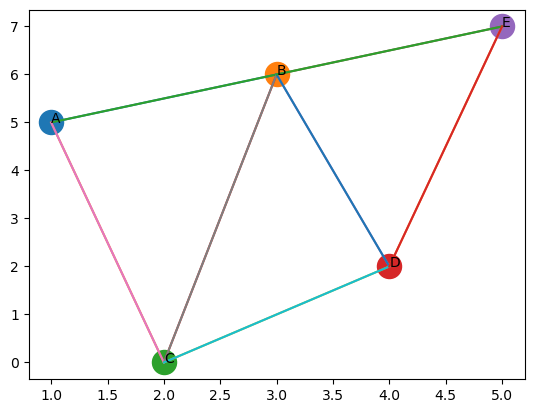

In [40]:
import pprint


g = Grafo()
try:
    g.add_node("A", x=1, y=5)
    g.add_node("B", x=3, y=6)
    g.add_node("C", x=2, y=0)
    g.add_node("D", x=4, y=2)
    g.add_node("E", x=5, y=7)
    g.add_edge("A", "B", coste=3)
    g.add_edge("A", "C", coste=1)
    g.add_edge("B", "C", coste=7)
    g.add_edge("C", "D", coste=2)
    g.add_edge("B", "D", coste=5)
    g.add_edge("B", "E", coste=1)
    g.add_edge("D", "E", coste=7)
    print(g.get_node_attributtes("A","edges",True))
    #g.remove_node("D")
    #g.remove_edge("A", "B")
    print("")
    g.set_edge_atributtes("A","B",prueba=5)
    g.get_edge_atributtes("A","B","prueba")
    pprint.pprint(g.nodos)
    g.dibuja()
except PersonalizedException as e:
    print(f"\033[91m{e}\033[0m")